<h1>Iris dataset visualization</h1>

In [ ]:
#load the dataset
import pandas as pd
df=pd.read_csv("../data_visualisation/Iris.csv")  

In [3]:
#print column name in our dataset
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
#check if there is any nan in dataset 
#data cleaning is neded or not
df_n = df.isna().sum()
df_n

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Our dataset is free from null values.

In [43]:
#print types of columns in datset it is helpfull 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#we can check how many types of species are in our species column 
df["Species"].unique()
#so three only as mentioned earlier

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
#it gives count,mean,std,min,25%,50%,75%,max of all column in our dataset
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


<h1>Starting data visualization</h1>

In [9]:
#let's count number of each unique species in our dataset
df["Species"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

<h1>Bar plot</h1>

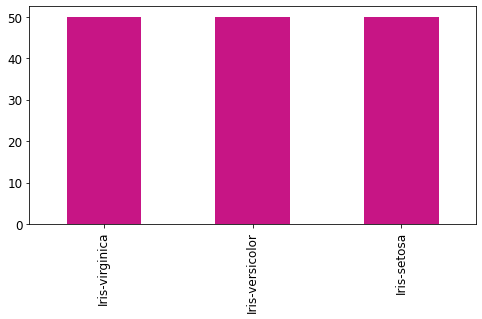

In [44]:
#we will now  visualize bar plot
#bar plot shows relation between numeric and categoric value 
#the length of bar represents the numberic value of category
df["Species"].value_counts().plot.bar(
  figsize=(8,4),
  color ='mediumvioletred',
  fontsize=12
)
#as  can be seen every category in species has 50 as numeric value

<h1>Box plot</h1>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f58c1ff5350>,
      dtype=object)

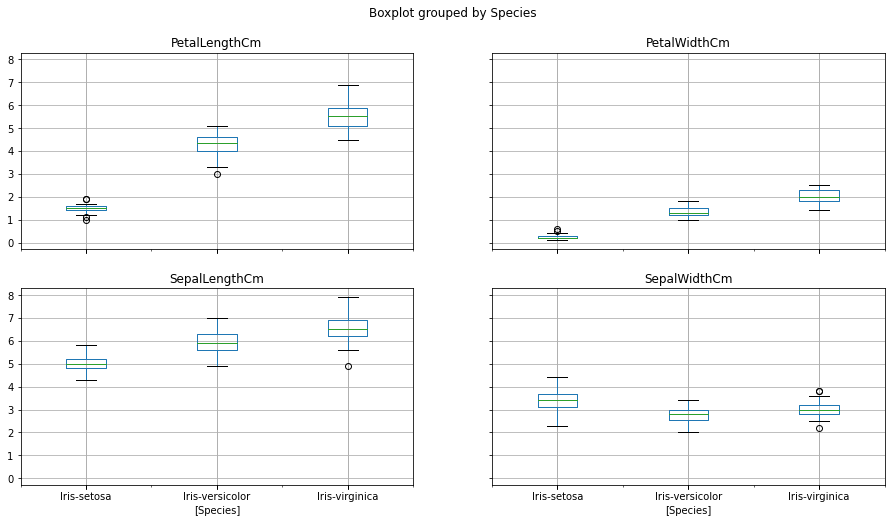

In [23]:
#as we don't know id column we will drop it 
df=df.drop(["Id"],axis=1)
#Now boxplot has a lot math behind it but in short it provides where how out data is symmetrical ,centralised,or skewed
df.boxplot(by="Species",figsize=(15,8))
#from plot if we compare median it is clear that there is difference between groups.

<h1>Scatter Plot</h1>

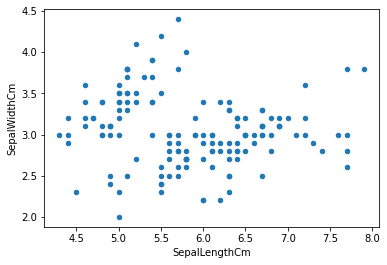

In [45]:
#It is usefull to study relationship between two variables 
#for example if SepalLength is 4.5 than what is corresponding SepalWidth
df.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

<h1>Subplot</h1>

This are very useful to group together different plots .So,we can compare them all.

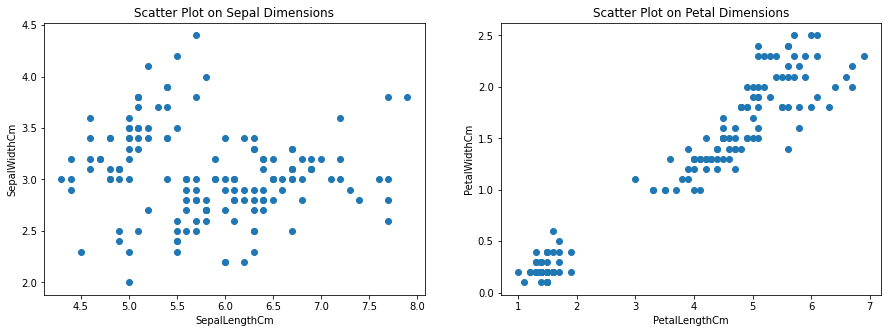

In [46]:
x1 = df['SepalLengthCm']
y1 = df['SepalWidthCm']
x2 = df['PetalLengthCm']
y2 = df['PetalWidthCm']

#here plt comes from matplotlib.pyplot 
#we ask to make a figure of size(15,5) or a box in which all subplot come
fig = plt.figure(figsize=(15,5))

#now to fig add subplots 
#first subplot added
ax1 = fig.add_subplot(121)#what 121 means make a 1X2 (1 row and 2 column) grid and put me in first grid 
#set labels of sub_plot 
ax1.set_xlabel('SepalLengthCm')
ax1.set_ylabel('SepalWidthCm')
ax1.set_title("Scatter Plot on Sepal Dimensions")
ax1.scatter(x1,y1)

#second subplot of grid
ax2 = fig.add_subplot(122)
ax2.set_xlabel('PetalLengthCm')
ax2.set_ylabel('PetalWidthCm')
ax2.set_title("Scatter Plot on Petal Dimensions")
ax2.scatter(x2,y2)

<h1>Some seaborn plots to make data distribution more clear</h1>

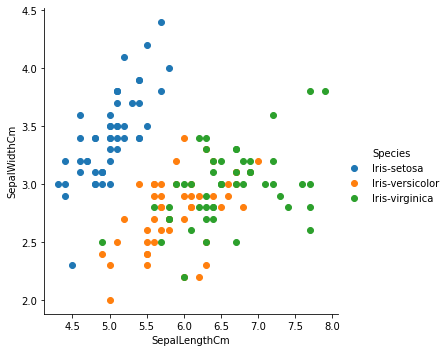

In [49]:
import seaborn as sns

#from scatter plot of sepal length vs sepal width we don't get which flowe species the dot represent 
# we can do this through seaborn
sns.FacetGrid(df, hue="Species", height=5).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()

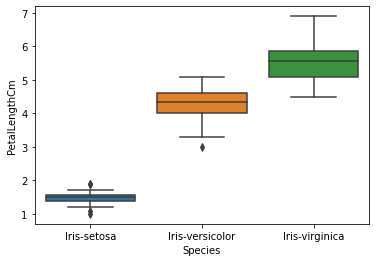

In [35]:
# Use seaborn's .boxplot extension to look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="Species", y="PetalLengthCm", data=df)

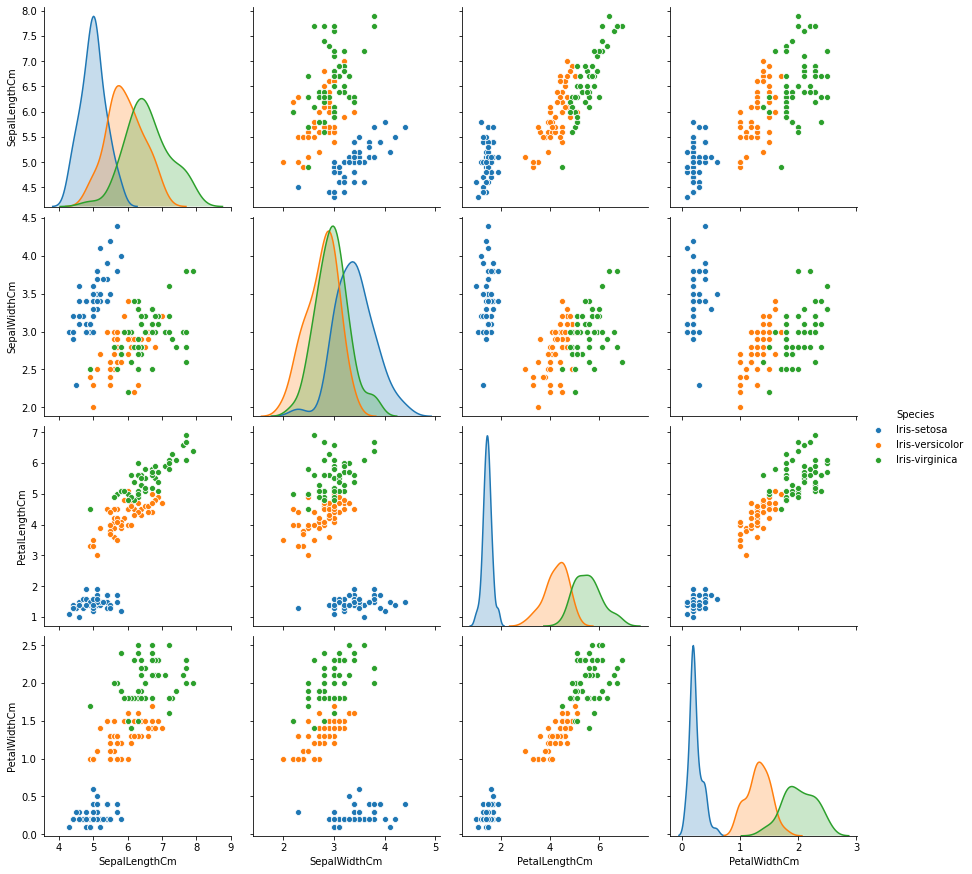

In [41]:
#pairplot are best way of EDA 
#it provide pairwise compination of all columns in dataset (n,2) combination
sns.pairplot(data=df,hue="Species", height=3)
#hue ="Species" plots different color with species aspect

we can observe that Iris virginica ,Iris versicolor always cluster together !